In [1]:
from google.colab import files
files.upload()

Saving table-5.xls to table-5.xls


{'table-5.xls': b'\xd0\xcf\x11\xe0\xa1\xb1\x1a\xe1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00>\x00\x03\x00\xfe\xff\t\x00\x06\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\xbf\x00\x00\x00\x00\x00\x00\x00\x00\x10\x00\x00\xd5\x00\x00\x00\x01\x00\x00\x00\xfe\xff\xff\xff\x00\x00\x00\x00\xbd\x00\x00\x00\xbe\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xf

In [28]:
import numpy as np
import pandas as pd

In [56]:
df = pd.read_excel("table-5.xls")

In [57]:
df

,Table 5,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Crime in the United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"by State, 2019",NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
2,State,Area,NaN,Population,Violent \ncrime1,Murder and \nnonnegligent \nmanslaughter,Rape2,Robbery,Aggravated \nassault,Property \ncrime,Burglary,Larceny-theft,Motor \nvehicle \ntheft
3,ALABAMA,Metropolitan Statistical Area,NaN,3728978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Area actually reporting,0.766,12880,182,1141,1706,9851,65789,12388,47299,6102
...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,1 The violent crime figures include the offen...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
514,2 The figures shown in this column for the off...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
515,3 Includes offenses reported by the Metro Tran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
516,4 Agencies within this state submitted rape da...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df.info

<bound method DataFrame.info of                                                Table 5  ...              Unnamed: 12
0                           Crime in the United States  ...                      NaN
1                                       by State, 2019  ...                      NaN
2                                                State  ...  Motor \nvehicle \ntheft
3                                              ALABAMA  ...                      NaN
4                                                  NaN  ...                     6102
..                                                 ...  ...                      ...
513  1  The violent crime figures include the offen...  ...                      NaN
514  2 The figures shown in this column for the off...  ...                      NaN
515  3 Includes offenses reported by the Metro Tran...  ...                      NaN
516  4 Agencies within this state submitted rape da...  ...                      NaN
517  NOTE:  Although arson data a

Data cleaning


In [59]:
#making the first ro as the header for columns
df = df.iloc[2:]
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

#fetching states by removing nan values
state_list = df['State'].tolist()
state_list = [state_list for state_list in state_list if str(state_list) != 'nan']
state_list = state_list[:-5]
df = df.loc[(df['Area'] == 'State Total')|(df['Area'] == 'Total')]
del df['State']


In [60]:
state_list

['ALABAMA',
 'ALASKA',
 'ARIZONA',
 'ARKANSAS',
 'CALIFORNIA',
 'COLORADO',
 'CONNECTICUT',
 'DELAWARE',
 'DISTRICT OF COLUMBIA3',
 'FLORIDA',
 'GEORGIA',
 'HAWAII',
 'IDAHO',
 'ILLINOIS',
 'INDIANA',
 'IOWA',
 'KANSAS',
 'KENTUCKY',
 'LOUISIANA',
 'MAINE',
 'MARYLAND',
 'MASSACHUSETTS',
 'MICHIGAN',
 'MINNESOTA',
 'MISSISSIPPI4',
 'MISSOURI',
 'MONTANA',
 'NEBRASKA',
 'NEVADA',
 'NEW HAMPSHIRE',
 'NEW JERSEY',
 'NEW MEXICO',
 'NEW YORK',
 'NORTH CAROLINA',
 'NORTH DAKOTA',
 'OHIO4',
 'OKLAHOMA',
 'OREGON4',
 'PENNSYLVANIA',
 'PUERTO RICO',
 'RHODE ISLAND',
 'SOUTH CAROLINA',
 'SOUTH DAKOTA',
 'TENNESSEE',
 'TEXAS',
 'UTAH',
 'VERMONT',
 'VIRGINIA',
 'WASHINGTON',
 'WEST VIRGINIA',
 'WISCONSIN',
 'WYOMING']

In [61]:
se = pd.Series(state_list)
df['State'] = se.values
df.index = np.arange(1, len(df) + 1)


In [62]:
#dropping unwanted columns
cols = [0,1,2]
df.drop(df.columns[cols],axis=1,inplace=True)

In [63]:
df.columns = ['Violent crime',
       'Murder', 'Rape', 'Robbery',
       'Assault', 'Property crime', 'Burglary', 'Larceny theft',
       'Motor vehicle theft', 'State']

In [64]:
#making states as index
df = df.set_index('State')
df = df.apply(pd.to_numeric, errors='coerce')

In [65]:
df.head(20)

,Violent crime,Murder,Rape,Robbery,Assault,Property crime,Burglary,Larceny theft,Motor vehicle theft
State,,,,,,,,,
ALABAMA,25046,358,2068,3941,18679,131133,26079,92477,12577
ALASKA,6343,69,1088,826,4360,21294,3563,15114,2617
ARIZONA,33141,365,3662,6410,22704,177638,28699,130788,18151
ARKANSAS,17643,242,2331,1557,13513,86250,18095,60735,7420
CALIFORNIA,174331,1690,14799,52301,105541,921114,152555,626802,141757
COLORADO,21938,218,3872,3663,14185,149189,20064,107012,22113
CONNECTICUT,6546,104,771,1929,3742,50862,6441,38457,5964
DELAWARE,4115,48,310,790,2967,21931,2968,17359,1604
DISTRICT OF COLUMBIA3,7403,166,345,2713,4179,30821,1843,26645,2333


In [66]:
df.describe()

,Violent crime,Murder,Rape,Robbery,Assault,Property crime,Burglary,Larceny theft,Motor vehicle theft
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,24074.788462,327.519231,2692.884615,5194.403846,15859.980769,133617.653846,21576.673077,98088.057692,13952.923077
std,30770.739183,353.850832,3072.100206,8490.783535,19280.596814,163712.446486,26791.166441,116777.791690,21812.644788
min,1258.000000,11.000000,215.000000,67.000000,824.000000,8888.000000,1275.000000,6984.000000,298.000000
25%,6212.500000,66.750000,762.250000,853.750000,3739.250000,30209.750000,4631.500000,25000.250000,3404.500000
50%,17078.000000,208.000000,1990.500000,2852.000000,10919.500000,85961.000000,15476.500000,64232.000000,10232.500000
75%,28187.000000,539.000000,2918.250000,5445.000000,19391.750000,159208.500000,27053.750000,114856.000000,15824.750000
max,174331.000000,1690.000000,14824.000000,52301.000000,105541.000000,921114.000000,152555.000000,626802.000000,141757.000000


Visualize

In [39]:
visualize_df = df
visualize_df["State_Total_crime"] = visualize_df.sum(axis=1) 
visualize_df

,Violent crime,Murder,Rape,Robbery,Assault,Property crime,Burglary,Larceny theft,Motor vehicle theft,State_Total_crime
State,,,,,,,,,,
ALABAMA,25046,358,2068,3941,18679,131133,26079,92477,12577,312358
ALASKA,6343,69,1088,826,4360,21294,3563,15114,2617,55274
ARIZONA,33141,365,3662,6410,22704,177638,28699,130788,18151,421558
ARKANSAS,17643,242,2331,1557,13513,86250,18095,60735,7420,207786
CALIFORNIA,174331,1690,14799,52301,105541,921114,152555,626802,141757,2190890
COLORADO,21938,218,3872,3663,14185,149189,20064,107012,22113,342254
CONNECTICUT,6546,104,771,1929,3742,50862,6441,38457,5964,114816
DELAWARE,4115,48,310,790,2967,21931,2968,17359,1604,52092
DISTRICT OF COLUMBIA3,7403,166,345,2713,4179,30821,1843,26645,2333,76448


Text(0.5, 0, 'States')

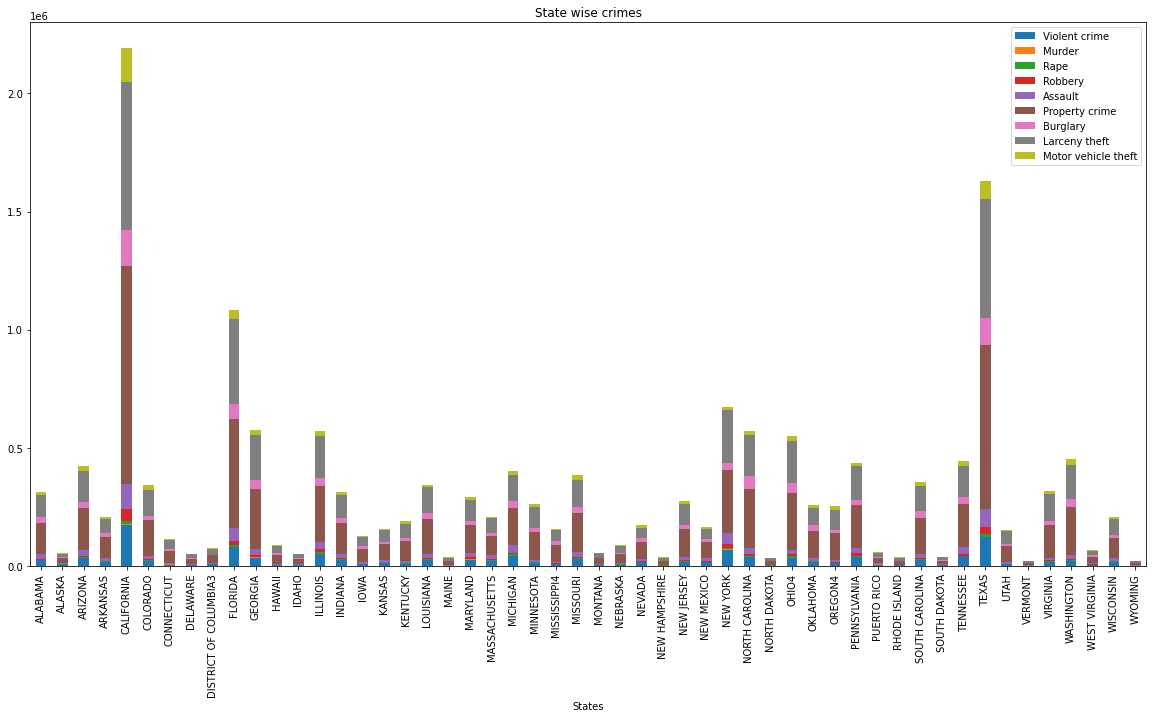

In [74]:
df.plot(kind='bar', stacked=True)
plt.title("State wise crimes")
plt.xlabel("States")

In [75]:
#standardize the data to normal distribution
from sklearn import preprocessing
df_standardized = preprocessing.scale(df)
print(df_standardized)
df_standardized = pd.DataFrame(df_standardized)

[[ 3.18707650e-02  8.69805772e-02 -2.05390825e-01 -1.49059561e-01
   1.47636639e-01 -1.53250104e-02  1.69692242e-01 -4.85177955e-02
  -6.36945702e-02]
 [-5.81877007e-01 -7.37716025e-01 -5.27503105e-01 -5.19507229e-01
  -6.02272765e-01 -6.92797174e-01 -6.78933500e-01 -7.17461588e-01
  -5.24765345e-01]
 [ 2.97512010e-01  1.06955927e-01  3.18534659e-01  1.44563326e-01
   3.58432459e-01  2.71511568e-01  2.68439775e-01  2.82750455e-01
   1.94338412e-01]
 [-2.11062174e-01 -2.44039512e-01 -1.18946407e-01 -4.32573924e-01
  -1.22915214e-01 -2.92157312e-01 -1.31223903e-01 -3.22985097e-01
  -3.02423685e-01]
 [ 4.93072850e+00  3.88800436e+00  3.97911064e+00  5.60209590e+00
   4.69674137e+00  4.85717144e+00  4.93655977e+00  4.57169331e+00
   5.91633783e+00]
 [-7.01197218e-02 -3.12526427e-01  3.87558719e-01 -1.82120380e-01
  -8.77214771e-02  9.60419666e-02 -5.70124939e-02  7.71637063e-02
   3.77748292e-01]
 [-5.75215466e-01 -6.37839274e-01 -6.31696567e-01 -3.88334267e-01
  -6.34638434e-01 -5.1042573

K means clustering 

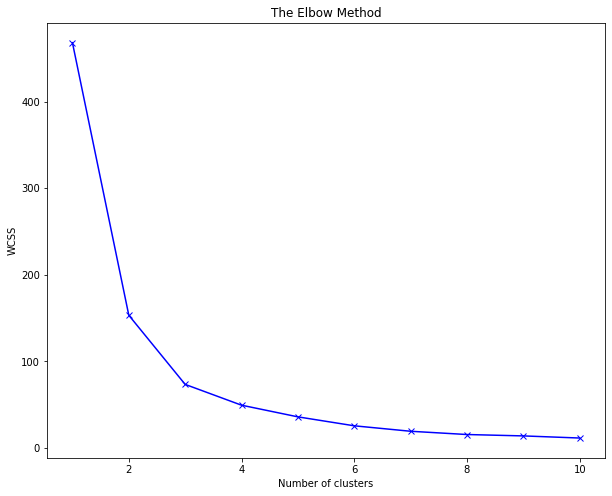

In [76]:
#Kmeans clustring; finding the no of clusters

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_standardized)
    wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works
plt.plot(range(1, 11), wcss,'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [77]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_standardized)

y_kmeans

array([2, 0, 2, 0, 1, 2, 0, 0, 0, 3, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2,
       3, 0, 0, 2, 2, 0, 0, 0], dtype=int32)

In [78]:
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1

# New list called cluster
cluster = list(y_kmeans1)
# Adding cluster to our data set
df['cluster'] = cluster

In [79]:
#Mean of clusters 1 to 4
kmeans_mean_cluster = pd.DataFrame(round(df.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Violent crime,Murder,Rape,Robbery,Assault,Property crime,Burglary,Larceny theft,Motor vehicle theft
cluster,,,,,,,,,
1,8567.0,123.0,1135.6,1513.7,5794.7,51600.2,8636.4,37586.4,5377.4
2,174331.0,1690.0,14799.0,52301.0,105541.0,921114.0,152555.0,626802.0,141757.0
3,33846.5,499.8,3708.2,6982.1,22656.3,181852.7,29133.7,136021.3,16697.7
4,101372.0,1265.5,11640.0,22602.5,65864.0,577025.0,88649.0,430107.5,58268.5


Text(0.5, 0, 'Clusters')

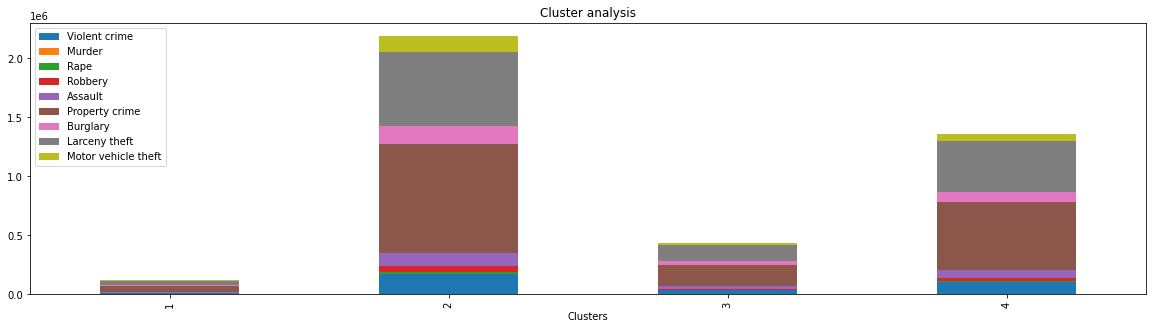

In [84]:
kmeans_mean_cluster.plot(kind='bar', stacked=True)
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Cluster analysis")
plt.xlabel("Clusters")

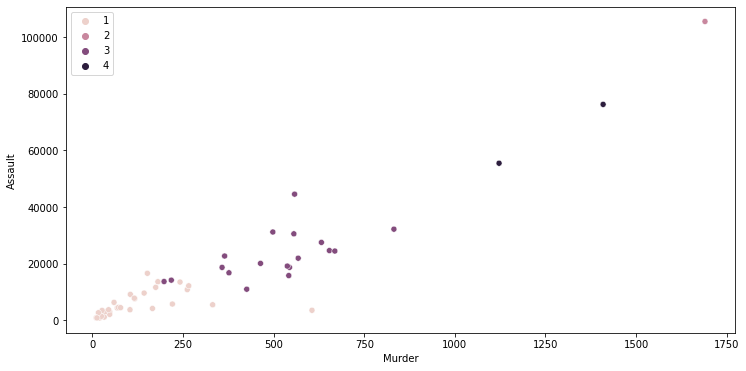

In [80]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Murder'], y = df['Assault'],hue=y_kmeans1)

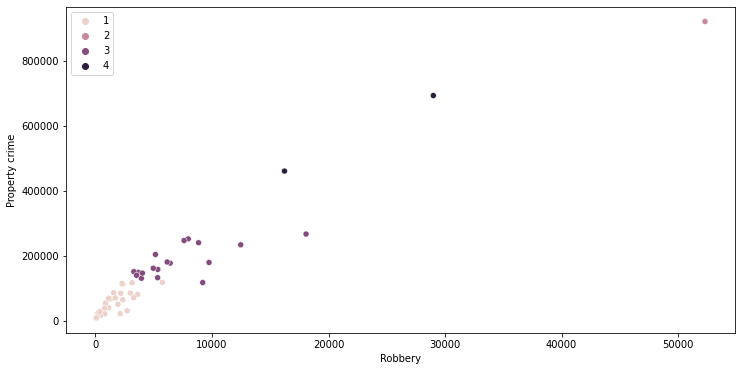

In [81]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Robbery'], y = df['Property crime'],hue=y_kmeans1)

In [85]:
df[df['cluster']==1]

,Violent crime,Murder,Rape,Robbery,Assault,Property crime,Burglary,Larceny theft,Motor vehicle theft,cluster
State,,,,,,,,,,
ALASKA,6343,69,1088,826,4360,21294,3563,15114,2617,1
ARKANSAS,17643,242,2331,1557,13513,86250,18095,60735,7420,1
CONNECTICUT,6546,104,771,1929,3742,50862,6441,38457,5964,1
DELAWARE,4115,48,310,790,2967,21931,2968,17359,1604,1
DISTRICT OF COLUMBIA3,7403,166,345,2713,4179,30821,1843,26645,2333,1
HAWAII,4042,48,765,1131,2098,40228,5340,29634,5254,1
IDAHO,4000,35,809,155,3001,21793,3927,16295,1571,1
IOWA,8410,60,1164,863,6323,54699,11710,37847,5142,1
KANSAS,11968,105,1416,1293,9154,67428,9984,50165,7279,1


In [86]:
df[df['cluster']==2]

,Violent crime,Murder,Rape,Robbery,Assault,Property crime,Burglary,Larceny theft,Motor vehicle theft,cluster
State,,,,,,,,,,
CALIFORNIA,174331,1690,14799,52301,105541,921114,152555,626802,141757,2


In [87]:
df[df['cluster']==3]

,Violent crime,Murder,Rape,Robbery,Assault,Property crime,Burglary,Larceny theft,Motor vehicle theft,cluster
State,,,,,,,,,,
ALABAMA,25046,358,2068,3941,18679,131133,26079,92477,12577,3
ARIZONA,33141,365,3662,6410,22704,177638,28699,130788,18151,3
COLORADO,21938,218,3872,3663,14185,149189,20064,107012,22113,3
GEORGIA,36170,654,2922,7961,24633,252249,39506,188967,23776,3
ILLINOIS,51561,832,6078,12464,32187,233984,34433,180776,18775,3
INDIANA,24966,377,2475,5331,16783,132694,21795,97176,13723,3
LOUISIANA,25537,544,2273,4025,18695,146993,26918,109359,10716,3
MARYLAND,27456,542,1913,9203,15798,117901,16862,89780,11259,3
MICHIGAN,43686,556,7235,5350,30545,158296,28572,111980,17744,3


In [88]:
df[df['cluster']==4]

,Violent crime,Murder,Rape,Robbery,Assault,Property crime,Burglary,Larceny theft,Motor vehicle theft,cluster
State,,,,,,,,,,
FLORIDA,81270,1122,8456,16217,55475,460846,63396,358402,39048,4
TEXAS,121474,1409,14824,28988,76253,693204,113902,501813,77489,4


In [89]:
df

,Violent crime,Murder,Rape,Robbery,Assault,Property crime,Burglary,Larceny theft,Motor vehicle theft,cluster
State,,,,,,,,,,
ALABAMA,25046,358,2068,3941,18679,131133,26079,92477,12577,3
ALASKA,6343,69,1088,826,4360,21294,3563,15114,2617,1
ARIZONA,33141,365,3662,6410,22704,177638,28699,130788,18151,3
ARKANSAS,17643,242,2331,1557,13513,86250,18095,60735,7420,1
CALIFORNIA,174331,1690,14799,52301,105541,921114,152555,626802,141757,2
COLORADO,21938,218,3872,3663,14185,149189,20064,107012,22113,3
CONNECTICUT,6546,104,771,1929,3742,50862,6441,38457,5964,1
DELAWARE,4115,48,310,790,2967,21931,2968,17359,1604,1
DISTRICT OF COLUMBIA3,7403,166,345,2713,4179,30821,1843,26645,2333,1


In [ ]:
from IPython.display import HTML
import base64


def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(df)

In [90]:
%%HTML
<div class='tableauPlaceholder' id='viz1616779578582' style='position: relative'>
<noscript>
<a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;St&#47;Statescrimes&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a>
</noscript>
<object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> 
<param name='embed_code_version' value='3' /> 
<param name='site_root' value='' />
<param name='name' value='Statescrimes&#47;Dashboard1' />
<param name='tabs' value='no' />
<param name='toolbar' value='yes' />
<param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;St&#47;Statescrimes&#47;Dashboard1&#47;1.png' /> 
<param name='animate_transition' value='yes' />
<param name='display_static_image' value='yes' />
<param name='display_spinner' value='yes' />
<param name='display_overlay' value='yes' />
<param name='display_count' value='yes' />
<param name='language' value='en' /><param name='filter' value='publish=yes' />
</object>
</div>                
<script type='text/javascript'>                    
var divElement = document.getElementById('viz1616779578582');                    
var vizElement = divElement.getElementsByTagName('object')[0];                    
if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='650px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='650px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>